### Imports

In [1]:
import pandas as pd
import glob
import os
import sklearn
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)

### setting features and class

In [2]:
attributes = [
   "Wife's age",
   "Wife's education",
   "Husband's education",
   "Number of children ever born",
   "Wife's religion",
   "Wife's now working?",
   "Husband's occupation",
   "Standard-of-living index",
   "Media exposure",                
   "Contraceptive method used"
]

features = [
    "Wife's age",
    "Wife's education",
    "Husband's education",
    "Number of children ever born",
    "Wife's religion",
    "Wife's now working?",
    "Husband's occupation",
    "Standard-of-living index",
    "Media exposure"
]
prediction_class = [
    "Contraceptive method used"
]

### import data


In [3]:
data_set = pd.read_csv('/content/sample_data/data.txt', names= attributes)


### normalization of features


In [4]:
def normalize_data_features(data_set):
    for key in features:
        min_feature = data_set[key].min()
        max_feature = data_set[key].max()
        data_set[key] = data_set[key].map(lambda row: (float)(row-min_feature)/(min_feature+max_feature))
    return data_set
    

In [5]:

data_set = normalize_data_features(data_set)
data_set

,Wife's age,Wife's education,Husband's education,Number of children ever born,Wife's religion,Wife's now working?,Husband's occupation,Standard-of-living index,Media exposure,Contraceptive method used
0,0.123077,0.2,0.4,0.1875,1.0,1.0,0.2,0.4,0.0,1
1,0.446154,0.0,0.4,0.6250,1.0,1.0,0.4,0.6,0.0,1
2,0.415385,0.2,0.4,0.4375,1.0,1.0,0.4,0.6,0.0,1
3,0.400000,0.4,0.2,0.5625,1.0,1.0,0.4,0.4,0.0,1
4,0.307692,0.4,0.4,0.5000,1.0,1.0,0.4,0.2,0.0,1
...,...,...,...,...,...,...,...,...,...,...
1468,0.261538,0.6,0.6,0.1250,1.0,0.0,0.2,0.6,0.0,3
1469,0.261538,0.6,0.6,0.1875,1.0,1.0,0.0,0.6,0.0,3
1470,0.353846,0.4,0.4,0.5000,1.0,0.0,0.0,0.6,0.0,3
1471,0.261538,0.4,0.4,0.2500,1.0,0.0,0.2,0.2,0.0,3


In [6]:
#data_set[predictioei glrn_class[0]] = pd.get_dummies(data_set['Contraceptive method used']).to_dict('split')['data']

### separating elements by class to create proportional train-test groups and joining them afterwards


In [7]:
gp = {}
df_by_class = {}
test_train_by_class = {}

for i in range(1, 4):
  gp[i] = data_set.loc[data_set[prediction_class[0]] == i]

  df_by_class[i] = {
      'features': gp[i][features].values,
      'class': gp[i][prediction_class[0]].values
  }


  features_train, features_test, class_train, class_test = train_test_split(df_by_class[i]['features'], df_by_class[i]['class'], test_size=0.30, random_state=42)
  test_train_by_class[i] = {
      'features_train': features_train,
      'features_test': features_test,
      'class_train': class_train,
      'class_test': class_test
  }



In [8]:
test_train_collection = {
      'features_train': pd.DataFrame(),
      'features_test': pd.DataFrame(),
      'class_train': pd.DataFrame(),
      'class_test': pd.DataFrame()
  }
for index in test_train_by_class:
  if(not test_train_collection['features_train'].empty):

    test_train_collection['features_train'] = test_train_collection['features_train'].append(pd.DataFrame(test_train_by_class[index]['features_train']), ignore_index = True)
    test_train_collection['features_test'] = test_train_collection['features_test'].append(pd.DataFrame(test_train_by_class[index]['features_test']), ignore_index = True)
    test_train_collection['class_train'] = test_train_collection['class_train'].append(pd.DataFrame(test_train_by_class[index]['class_train']), ignore_index = True)
    test_train_collection['class_test'] = test_train_collection['class_test'].append(pd.DataFrame(test_train_by_class[index]['class_test']), ignore_index = True)
  else:
    test_train_collection['features_train'] = pd.DataFrame(test_train_by_class[index]['features_train'])
    test_train_collection['features_test'] = pd.DataFrame(test_train_by_class[index]['features_test'])
    test_train_collection['class_train'] = pd.DataFrame(test_train_by_class[index]['class_train'])
    test_train_collection['class_test'] = pd.DataFrame(test_train_by_class[index]['class_test'])
    

### brute force on params of decision tree


In [9]:
models = []

#setting possible attr
iterations = list(range(1, 31)) ## iterating to get the mean metrics values of random models created by specific params
criterions = ['gini','entropy']
splitters = ['best','random']
max_featuress = list(range(1,10))
#max_leaf_nodess = list(range(1,10))
max_depths = list(range(1,30))




for criterion in criterions:
  print(criterion)
  for splitter in splitters:
    print(splitter)
    for max_features in max_featuress:
      for max_depth in max_depths:

        


        iter_metrics = {
            'accuracy': 0,
        }
        for iteration in iterations:
          clf = tree.DecisionTreeClassifier(criterion = criterion, splitter = splitter, max_features = max_features, max_depth = max_depth)

          clf = clf.fit(test_train_collection['features_train'], test_train_collection['class_train']) # fit encontra padrões nos dados
          prediction = clf.predict(test_train_collection['features_test'].values)
          iter_metrics['accuracy'] = iter_metrics['accuracy'] + metrics.accuracy_score(test_train_collection['class_test'].values, prediction)
        
        models.append({
            'params': [criterion, splitter, max_features, max_depth],
            'metrics_accuracy': iter_metrics['accuracy']/30,
        })






gini
best
random
entropy
best
random


In [10]:
max = 0
params = []
for model in models:
  if(max < model['metrics_accuracy']):
    max = model['metrics_accuracy']
    params = model['params']

In [11]:
print(models)
print(max)
print(params)

[{'params': ['gini', 'best', 1, 1], 'metrics_accuracy': 0.42927012791572616}, {'params': ['gini', 'best', 1, 2], 'metrics_accuracy': 0.4335590669676449}, {'params': ['gini', 'best', 1, 3], 'metrics_accuracy': 0.4480060195635816}, {'params': ['gini', 'best', 1, 4], 'metrics_accuracy': 0.4538750940556809}, {'params': ['gini', 'best', 1, 5], 'metrics_accuracy': 0.4626787057938298}, {'params': ['gini', 'best', 1, 6], 'metrics_accuracy': 0.4716328066215199}, {'params': ['gini', 'best', 1, 7], 'metrics_accuracy': 0.4715575620767494}, {'params': ['gini', 'best', 1, 8], 'metrics_accuracy': 0.48239277652370216}, {'params': ['gini', 'best', 1, 9], 'metrics_accuracy': 0.4697516930022573}, {'params': ['gini', 'best', 1, 10], 'metrics_accuracy': 0.48021068472535744}, {'params': ['gini', 'best', 1, 11], 'metrics_accuracy': 0.46621519939804373}, {'params': ['gini', 'best', 1, 12], 'metrics_accuracy': 0.4704288939051919}, {'params': ['gini', 'best', 1, 13], 'metrics_accuracy': 0.46230248306997745}, {'

###plotting results


In [12]:
def getMetrics(models, index, max_depths):
  temp = []
  for j in range (index,index + len(max_depths)):
    temp.append(models[j]['metrics_accuracy'])
  #print(len(temp))
  return temp

783


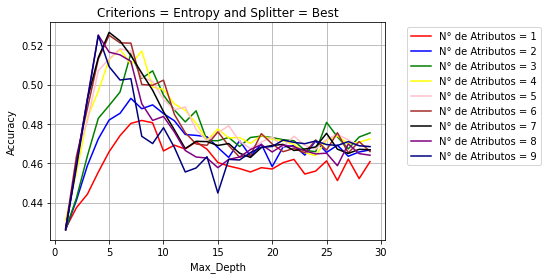

In [13]:
import matplotlib.pyplot as plt

max_depthsPlot = np.array(max_depths)
#print(len(models))
plotEntries = []

m = 522
for i in range(1, 10):
  plotEntries.append({'{'+str(i)+'}': getMetrics(models, m, max_depths)})
  m += len(max_depths)

print(m)
plt.plot(max_depthsPlot,  np.array(plotEntries[0]['{1}']),  color='red', label="N° de Atributos = 1")
plt.plot(max_depthsPlot,  np.array(plotEntries[1]['{2}']), color='blue', label="N° de Atributos = 2")
plt.plot(max_depthsPlot,  np.array(plotEntries[2]['{3}']), color='green', label="N° de Atributos = 3")
plt.plot(max_depthsPlot,  np.array(plotEntries[3]['{4}']), color='yellow', label="N° de Atributos = 4")
plt.plot(max_depthsPlot,  np.array(plotEntries[4]['{5}']), color='pink', label="N° de Atributos = 5")
plt.plot(max_depthsPlot,  np.array(plotEntries[5]['{6}']), color='brown', label="N° de Atributos = 6")
plt.plot(max_depthsPlot,  np.array(plotEntries[6]['{7}']), color='black', label="N° de Atributos = 7")
plt.plot(max_depthsPlot,  np.array(plotEntries[7]['{8}']), color='purple', label="N° de Atributos = 8")
plt.plot(max_depthsPlot,  np.array(plotEntries[8]['{9}']), color='navy', label="N° de Atributos = 9")
plt.grid(True)
plt.xlabel('Max_Depth')
plt.ylabel('Accuracy')
#plt.title('Criterions = Gini and Splitter = Best')
#plt.title('Criterions = Gini and Splitter = Random')
plt.title('Criterions = Entropy and Splitter = Best')
#plt.title('Criterions = Entropy and Splitter = Random')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [16]:
# KNN
knn_models = []

#setting possible attr
iterations = list(range(1, 31)) ## iterating to get the mean metrics values of random models created by specific params
n_neighborss = list(range(1,51))
weightss = ['uniform', 'distance']
algorithms = ['ball_tree','kd_tree','brute']
ps = list(range(1,3))
leaf_size = []


for weights in weightss:
  for algorithm in algorithms:
    for p in ps:
      for n_neighbors in n_neighborss:
        iter_metrics = {
            'accuracy': 0
        }
        for iteration in iterations:
          neigh = KNeighborsClassifier(n_neighbors=n_neighbors, weights = weights, algorithm = algorithm, p = p)

          neigh = neigh.fit(test_train_collection['features_train'], np.ravel(test_train_collection['class_train'], order='C')) # fit encontra padrões nos dados
          prediction = neigh.predict(test_train_collection['features_test'].values)
          iter_metrics['accuracy'] = iter_metrics['accuracy'] + metrics.accuracy_score(test_train_collection['class_test'].values, prediction)
        
        knn_models.append({
            'params': [n_neighbors, weights, algorithm, p],
            'metrics': iter_metrics['accuracy']/30
        })





In [17]:
maxKnn = 0
paramsKnn = []
for model in knn_models:
  if(maxKnn < model['metrics']):
    maxKnn = model['metrics']
    paramsKnn = model['params']

In [18]:
print(knn_models)
print(maxKnn)
print(paramsKnn)

[{'params': [1, 'uniform', 'ball_tree', 1], 'metrics': 0.42212189616252804}, {'params': [2, 'uniform', 'ball_tree', 1], 'metrics': 0.45598194130925535}, {'params': [3, 'uniform', 'ball_tree', 1], 'metrics': 0.4785553047404067}, {'params': [4, 'uniform', 'ball_tree', 1], 'metrics': 0.4943566591422125}, {'params': [5, 'uniform', 'ball_tree', 1], 'metrics': 0.510158013544018}, {'params': [6, 'uniform', 'ball_tree', 1], 'metrics': 0.49661399548532753}, {'params': [7, 'uniform', 'ball_tree', 1], 'metrics': 0.5033860045146724}, {'params': [8, 'uniform', 'ball_tree', 1], 'metrics': 0.49209932279909724}, {'params': [9, 'uniform', 'ball_tree', 1], 'metrics': 0.45598194130925535}, {'params': [10, 'uniform', 'ball_tree', 1], 'metrics': 0.4785553047404067}, {'params': [11, 'uniform', 'ball_tree', 1], 'metrics': 0.45372460496614014}, {'params': [12, 'uniform', 'ball_tree', 1], 'metrics': 0.48532731376975147}, {'params': [13, 'uniform', 'ball_tree', 1], 'metrics': 0.5056433408577875}, {'params': [14

In [19]:
def getMetricsKnn(knn_models, index, n_neighbors):
  temp = []
  for j in range (index,index + len(n_neighbors)):
    temp.append(knn_models[j]['metrics'])
  #print(len(temp))
  return temp

600


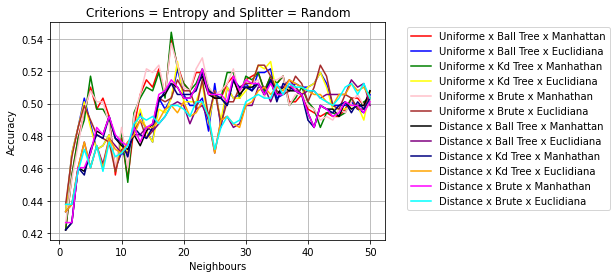

In [20]:
import matplotlib.pyplot as plt

n_neighborsPlot = np.array(n_neighborss)
#print(len(models))
plotEntries = []

m = 0

for i in range(1, 13):
  plotEntries.append({'{'+str(i)+'}': getMetricsKnn(knn_models, m, n_neighborss)})
  m += len(n_neighborss)

print(m)
plt.plot(n_neighborsPlot,  np.array(plotEntries[0]['{1}']),  color='red', label="Uniforme x Ball Tree x Manhattan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[1]['{2}']), color='blue', label="Uniforme x Ball Tree x Euclidiana")
plt.plot(n_neighborsPlot,  np.array(plotEntries[2]['{3}']), color='green', label="Uniforme x Kd Tree x Manhathan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[3]['{4}']), color='yellow', label="Uniforme x Kd Tree x Euclidiana")
plt.plot(n_neighborsPlot,  np.array(plotEntries[4]['{5}']), color='pink', label="Uniforme x Brute x Manhathan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[5]['{6}']), color='brown', label="Uniforme x Brute x Euclidiana")
plt.plot(n_neighborsPlot,  np.array(plotEntries[6]['{7}']),  color='black', label="Distance x Ball Tree x Manhattan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[7]['{8}']), color='purple', label="Distance x Ball Tree x Euclidiana")
plt.plot(n_neighborsPlot,  np.array(plotEntries[8]['{9}']), color='navy', label="Distance x Kd Tree x Manhathan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[9]['{10}']), color='orange', label="Distance x Kd Tree x Euclidiana")
plt.plot(n_neighborsPlot,  np.array(plotEntries[10]['{11}']), color='fuchsia', label="Distance x Brute x Manhathan")
plt.plot(n_neighborsPlot,  np.array(plotEntries[11]['{12}']), color='aqua', label="Distance x Brute x Euclidiana")
plt.grid(True)
plt.xlabel('Neighbours')
plt.ylabel('Accuracy')
#plt.title('Criterions = Gini and Splitter = Best')
#plt.title('Criterions = Gini and Splitter = Random')
#plt.title('Criterions = Entropy and Splitter = Best')
plt.title('Criterions = Entropy and Splitter = Random')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()